In [1]:
!pip install datasets transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.0 MB/s eta 0:00:00


In [1]:
from datasets import load_dataset

dataset_train = load_dataset(
    'cifar10',
    split = 'train',
    ignore_verifications = False,
)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1760: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=all_checks' instead.
  warnings.warn(


In [2]:
from datasets import load_dataset

dataset_test = load_dataset(
    'cifar10',
    split = 'test',
    ignore_verifications = True,
)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1760: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


In [3]:
num_classes = len(set(dataset_train['label']))
labels = dataset_train.features['label']
num_classes, labels

(10,
 ClassLabel(names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], id=None))

In [4]:
dataset_train[0]

{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x7F8C50CAD8D0>,
 'label': 0}

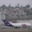

In [5]:
dataset_train[0]['img']

In [6]:
from transformers import ViTFeatureExtractor

model_name_or_path = "google/vit-base-patch16-224-in21k"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)


/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [7]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [8]:
example = feature_extractor(
    dataset_train[0]['img'],
    return_transors = 'pt'
    )
print(example)

{'pixel_values': [array([[[ 0.39607847,  0.39607847,  0.39607847, ...,  0.2941177 ,
          0.2941177 ,  0.2941177 ],
        [ 0.39607847,  0.39607847,  0.39607847, ...,  0.2941177 ,
          0.2941177 ,  0.2941177 ],
        [ 0.39607847,  0.39607847,  0.39607847, ...,  0.2941177 ,
          0.2941177 ,  0.2941177 ],
        ...,
        [-0.19215685, -0.19215685, -0.19215685, ..., -0.2862745 ,
         -0.2862745 , -0.2862745 ],
        [-0.19215685, -0.19215685, -0.19215685, ..., -0.2862745 ,
         -0.2862745 , -0.2862745 ],
        [-0.19215685, -0.19215685, -0.19215685, ..., -0.2862745 ,
         -0.2862745 , -0.2862745 ]],

       [[ 0.3803922 ,  0.3803922 ,  0.3803922 , ...,  0.27843142,
          0.27843142,  0.27843142],
        [ 0.3803922 ,  0.3803922 ,  0.3803922 , ...,  0.27843142,
          0.27843142,  0.27843142],
        [ 0.3803922 ,  0.3803922 ,  0.3803922 , ...,  0.27843142,
          0.27843142,  0.27843142],
        ...,
        [-0.24705881, -0.24705881, -

In [9]:
import numpy as np
np.shape(example['pixel_values'])

(1, 3, 224, 224)

In [10]:
dataset_train[0]['img'].size

(32, 32)

In [11]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [12]:
def preprocess(batch):
    inputs = feature_extractor(
        batch['img'],
        return_tensors = 'pt'
        )
    inputs['label'] = batch['label']
    return inputs

In [13]:
prepared_train = dataset_train.with_transform(preprocess)

prepared_test = dataset_test.with_transform(preprocess)

# Fine Tuning

In [14]:
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch]),
        }

In [15]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(p):
    return metric.compute(
        predictions = np.argmax(p.predictions, axis = 1),
        references = p.label_ids,
        )

<ipython-input-15-9192b152074a>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [24]:
!pip install accelerate -U

  Using cached accelerate-0.20.3-py3-none-any.whl (227 kB)
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.20.1
    Uninstalling accelerate-0.20.1:
      Successfully uninstalled accelerate-0.20.1


In [16]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./cifar",
    per_device_train_batch_size=16,
    evaluation_strategy="steps",
    num_train_epochs=4,
    save_steps=100,
    eval_steps=100,
    logging_steps=10,
    learning_rate=2e-4,
    save_total_limit=2,
    remove_unused_columns=False,
    push_to_hub=False,
    load_best_model_at_end=True,
    )

In [17]:
from transformers import ViTForImageClassification

labels = dataset_train.features['label'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels = len(labels),
    )

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
model.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [19]:
from transformers import Trainer

trainer = Trainer(
    model = model,
    args = training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_train,
    eval_dataset=prepared_test,
    tokenizer=feature_extractor,
    )

In [ ]:
!pip install bitsandbytes-cuda117

     ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.3 MB 653.6 kB/s eta 0:00:07
     - -------------------------------------- 0.1/4.3 MB 1.4 MB/s eta 0:00:03
     -- ------------------------------------- 0.3/4.3 MB 2.0 MB/s eta 0:00:03
     --- ------------------------------------ 0.4/4.3 MB 2.2 MB/s eta 0:00:02
     ----- ---------------------------------- 0.6/4.3 MB 2.5 MB/s eta 0:00:02
     -------- ------------------------------- 0.9/4.3 MB 2.9 MB/s eta 0:00:02
     ---------- ----------------------------- 1.2/4.3 MB 3.4 MB/s eta 0:00:01
     -------------- ------------------------- 1.6/4.3 MB 4.1 MB/s eta 0:00:01
     ------------------ --------------------- 2.0/4.3 MB 4.5 MB/s eta 0:00:01
     ----------------------- ---------------- 2.5/4.3 MB 5.2 MB/s eta 0:00:01
     ------------------------- -------------- 2.8/4.3 MB 5.2 MB/s eta 0:00:01
     ----------------------------- ---------- 3.2/4.3 MB 5.5 MB/s eta

In [20]:
train_results = trainer.train()

trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)


trainer.save_state()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
100,0.357600,0.592181,0.843900
200,0.374900,0.425898,0.884200
300,0.472100,0.292887,0.918000
400,0.415100,0.385429,0.886800


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:1645 in train                    │
│                                                                                                  │
│   1642 │   │   inner_training_loop = find_executable_batch_size(                                 │
│   1643 │   │   │   self._inner_training_loop, self._train_batch_size, args.auto_find_batch_size  │
│   1644 │   │   )                                                                                 │
│ ❱ 1645 │   │   return inner_training_loop(                                                       │
│   1646 │   │   │   args=args,                                                                    │
│   1647 │   │   │   resume_from_checkpoint=resume_from_checkpoint,                                │
│   1648 │   │   │   trial=trial,                                                                  │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:1943 in _inner_training_loop     │
│                                                                                                  │
│   1940 │   │   │   │   if (                                                                      │
│   1941 │   │   │   │   │   args.logging_nan_inf_filter                                           │
│   1942 │   │   │   │   │   and not is_torch_tpu_available()                                      │
│ ❱ 1943 │   │   │   │   │   and (torch.isnan(tr_loss_step) or torch.isinf(tr_loss_step))          │
│   1944 │   │   │   │   ):                                                                        │
│   1945 │   │   │   │   │   # if loss is nan or inf simply add the average of previous logged lo  │
│   1946 │   │   │   │   │   tr_loss += tr_loss / (1 + self.state.global_step - self._globalstep_  │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

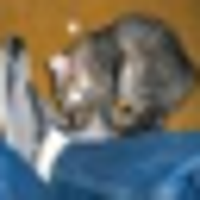

In [22]:
image = dataset_test["img"][0].resize((200,200))
image

In [ ]:
metrics = trainer.evaluate(prepared_test)
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

In [36]:
image = dataset_test["img"][0].resize((200,200))
image.to(device)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 2>:2                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/PIL/Image.py:546 in __getattr__                          │
│                                                                                                  │
│    543 │   │   │   │   stacklevel=2,                                                             │
│    544 │   │   │   )                                                                             │
│    545 │   │   │   return self._category                                                         │
│ ❱  546 │   │   raise AttributeError(name)                                                        │
│    547 │                                                                                         │
│    548 │   @property                                                                             │
│    549 │   def width(self):                                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: to

In [30]:
actual_label = dataset_test["label"][0]

labels = dataset_test.features['label']
actual_label, labels.names[actual_label]

(3, 'cat')

In [45]:
import torch
import torchvision.transforms as transforms

# Convert the PIL image to a NumPy array
np_image = transforms.ToTensor()(image).numpy()

# Transfer the NumPy array to CUDA
image_np = torch.from_numpy(np_image).to(torch.device("cuda"))

# Move the model's parameters to CUDA
model = model.to(torch.device("cuda"))

# Continue with the rest of your code
inputs = feature_extractor(image_np, return_tensors="pt")

# Move the input tensors to CUDA
inputs = {key: value.to(torch.device("cuda")) for key, value in inputs.items()}

with torch.no_grad():
    logits = model(**inputs).logits


In [47]:
predicted_label = logits.argmax(-1).item()
labels = dataset_test.features['label']
labels.names[predicted_label]

'cat'